In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ramen-ratings/ramen-ratings.csv


# Exploratory Data Analysis by Tamoghna Das (Sample analysis for practice of Python based EDA)

- Hello Everyone!This Ramen Rating Dataset is a very good dataset for beginner and I hope you can understand this analysis. 
- Feel free to add and customize this notebook to add more functionality
- I hope you will find it useful for your portfolio development

# Library import

In [2]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation


# Reading the csv file

In [3]:
data=pd.read_csv("/kaggle/input/ramen-ratings/ramen-ratings.csv")
data.head(10)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


# Writing to a csv file


In [4]:
#DataFrame.to_csv(filename, sep=',', index=False, encoding='utf-8')

In [5]:
#checking total rows and column in our data

data.shape

# The dataset has 2580 columns and 7 rows

(2580, 7)

# Lets get the columns

In [6]:
data.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')



Alright, we know that we got 7 columns in our data. Which are:

    1. Review : unique numbers that inform the review order from the latest
    2. Brand : Ramen brand
    3. Variety: variation of ramen
    4. Style : style of ramen
    5. Country: Where the ramen is available
    6. Stars : Ramen ratings
    7. Top Ten: ramen achievement



In [7]:
# Rename the column from 'Review #' to 'Review'

data.rename(columns={"Review #": "Review"}, inplace=True)
data.columns

Index(['Review', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')

# Data Cleaning and transformation

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Review   2580 non-null   int64 
 1   Brand    2580 non-null   object
 2   Variety  2580 non-null   object
 3   Style    2578 non-null   object
 4   Country  2580 non-null   object
 5   Stars    2580 non-null   object
 6   Top Ten  41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


The datatypes of the columns look correct with respect to the data in the columns.
Hence we can proceed with null values check step

In [9]:
data.isna().sum()

Review        0
Brand         0
Variety       0
Style         2
Country       0
Stars         0
Top Ten    2539
dtype: int64

In [10]:
data.isnull().sum()


Review        0
Brand         0
Variety       0
Style         2
Country       0
Stars         0
Top Ten    2539
dtype: int64

- There are two instances in the "Style" column where data is missing. 
- Similarly, the "Top Ten" column only contains values for ramens that achieved 'Top Ten' status. 
- For style column, we can safely remove these few missing entries since they represent a very small portion of the data.
- We will retain the missing values in the "Top Ten" column

In [11]:
data = data.dropna(subset=['Style'])
print(data["Style"].isnull().sum())

0


# Style can be a good distinguishing factor for the noodles

- Lets find the unique values

In [12]:
data['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar'], dtype=object)

In [13]:
# Counting the occurences
data['Style'].value_counts()

Style
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


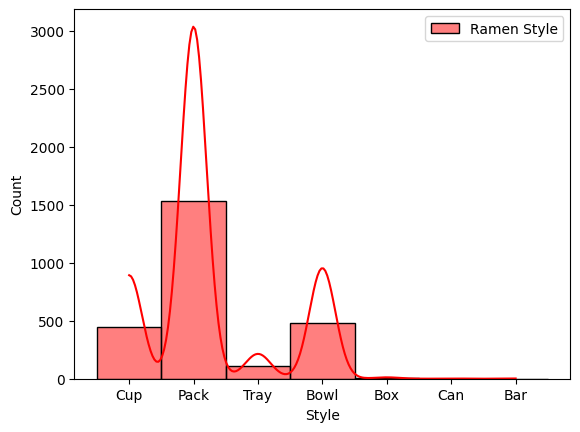

In [14]:
sns.histplot(data=data, x='Style', color='red', label="Ramen Style", kde=True)

# Add legend
plt.legend()

# Show plot
plt.show()

The error message you're encountering is a warning from the Seaborn library about a deprecated option in Pandas. Here's how to tackle it:

Understanding the Warning:

    - use_inf_as_na is an option that used to treat infinity (inf) values as missing data (NA) in Pandas.
    - This option is being deprecated, meaning it will be removed in a future version of Pandas.
    - The recommended approach is to convert infinity values (inf) to Not a Number (NaN) before performing any operations.

Solutions:

1. Convert Infinity to NaN:

This is the recommended approach and ensures compatibility with future Pandas versions. You can modify your code to explicitly convert inf values to NaN before using them. Here's an example:

In [15]:
# Convert inf to NaN before using
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [16]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

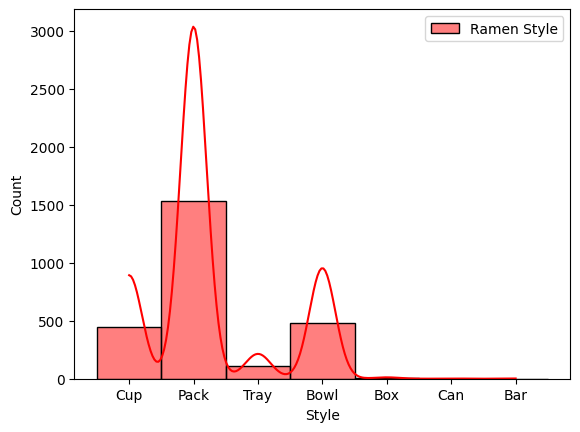

In [17]:
sns.histplot(data=data, x='Style', color='red', label="Ramen Style", kde=True)

# Add legend
plt.legend()

# Show plot
plt.show()

- Ramen Pack is the most popular style of ramen, with a count of around 1500.
- Cup and bowl styles all have a count of around 500.
- Tray style is less popular with around 100 count
- Box,Can and bar styles appear to be the least popular, with counts close to 5.


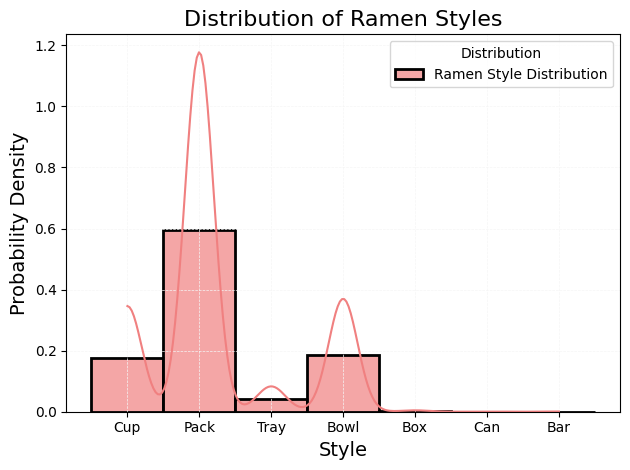

In [18]:
# Create the histogram with customizations
sns.histplot(
    data=data,
    x='Style',
    color='lightcoral',  # Adjust color for better contrast
    bins=10,  # Adjust number of bins for smoother distribution
    stat="density",  # Normalize histogram to represent probability density
    kde=True,  # Add a smooth kernel density curve
    linewidth=2,  # Increase line width of bars for better visibility
    edgecolor='black',  # Add black border for contrast
    alpha=0.7,  # Set transparency level
    label="Ramen Style Distribution"  # Label for legend
)

# Customize title, labels, and legend
plt.title("Distribution of Ramen Styles", fontsize=16)
plt.xlabel("Style", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.legend(title="Distribution", loc='upper right')  # Legend position

# Rotate x-axis labels for better readability if needed
# plt.xticks(rotation=45)  # Uncomment if x-axis labels overlap

# Reduce grid lines and adjust grid color
plt.grid(color='whitesmoke', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


### Pack Style is the most ordered style of Ramen. Now let's see all countries in Country column.

In [19]:
print(data["Country"].unique(), end='\n\n')
print("No of Countries:",len(data["Country"].unique()), 'Countries')

['Japan' 'Taiwan' 'USA' 'India' 'South Korea' 'Singapore' 'Thailand'
 'Hong Kong' 'Vietnam' 'Ghana' 'Malaysia' 'Indonesia' 'China' 'Nigeria'
 'Germany' 'Hungary' 'Mexico' 'Fiji' 'Australia' 'Pakistan' 'Bangladesh'
 'Canada' 'Nepal' 'Brazil' 'UK' 'Myanmar' 'Netherlands' 'United States'
 'Cambodia' 'Finland' 'Sarawak' 'Philippines' 'Sweden' 'Colombia'
 'Estonia' 'Holland' 'Poland' 'Dubai']

No of Countries: 38 Countries


In [20]:
# Let's see the distribution of countries
data['Country'].value_counts()

Country
Japan            352
USA              323
South Korea      309
Taiwan           223
Thailand         191
China            168
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: count, dtype: int64

In [21]:
# Get the value counts
counts = data['Country'].value_counts()
print(counts)
# Filter data based on count
filtered_data = data[data['Country'].isin(counts[counts > 100].index)]

Country
Japan            352
USA              323
South Korea      309
Taiwan           223
Thailand         191
China            168
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: count, dtype: int64


In [22]:
filtered_data

,Review,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


Explanation:

    - value_counts() creates a Series containing the counts for each unique country.
    - We filter the counts Series to keep only countries with counts greater than 100 using counts[counts > 100].
    - We then extract the country names (index) from the filtered counts Series.
    - Finally, we filter the original data DataFrame to keep rows where the 'Country' column value is present in the list of countries with counts greater than 100 (filtered_data).

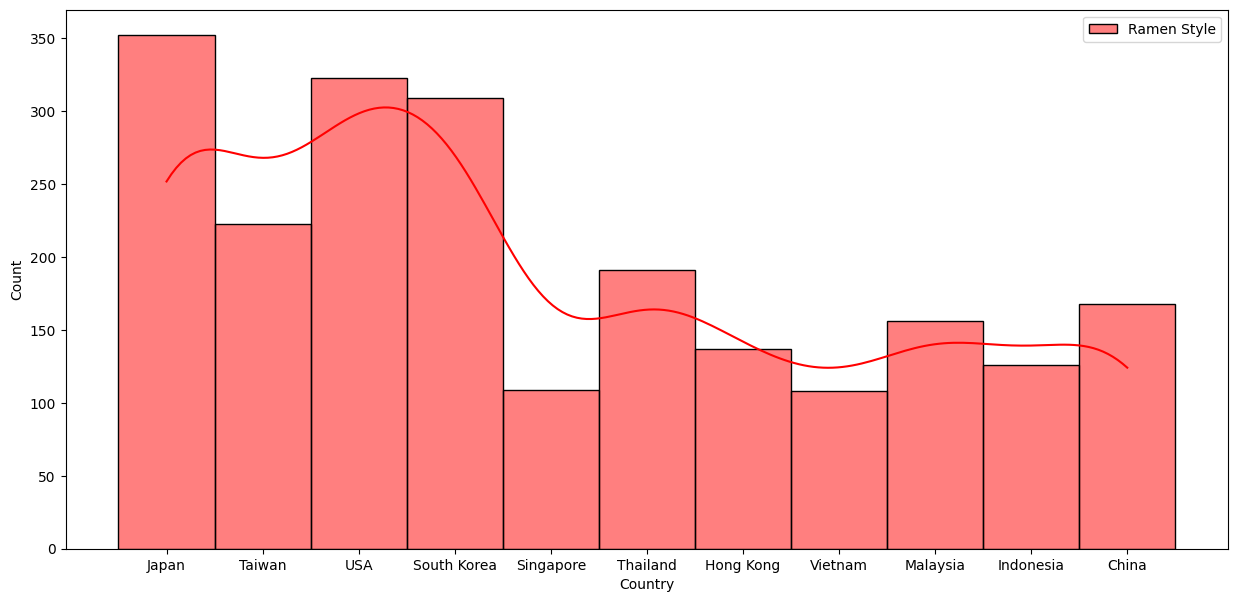

In [23]:
# Visualize the distribution
plt.figure(figsize=(15,7))
sns.histplot(data=filtered_data, x='Country', color='red', label="Ramen Style", kde=True)


# Set x-axis label
plt.xlabel("Country")

# Add legend
plt.legend()

# Show plot
plt.show()

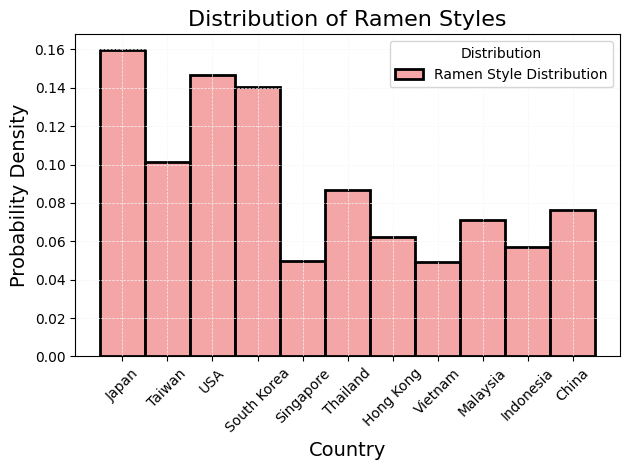

In [24]:
# Create the histogram with customizations
sns.histplot(
    data=filtered_data,
    x='Country',
    color='lightcoral',  # Adjust color for better contrast
    bins=10,  # Adjust number of bins for smoother distribution
    stat="density",  # Normalize histogram to represent probability density
    kde=False,  # Add a smooth kernel density curve
    linewidth=2,  # Increase line width of bars for better visibility
    edgecolor='black',  # Add black border for contrast
    alpha=0.7,  # Set transparency level
    label="Ramen Style Distribution"  # Label for legend
)

# Customize title, labels, and legend
plt.title("Distribution of Ramen Styles", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.legend(title="Distribution", loc='upper right')  # Legend position

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)  # Uncomment if x-axis labels overlap

# Reduce grid lines and adjust grid color
plt.grid(color='whitesmoke', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


# The Top 10

## Let's see all top 10 ramen for each year.

In [25]:
top10 = data.dropna()
top10

,Review,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5,2016 #7
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5,2015 #7
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5,2015 #4
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9


Upon examining the data, we identified the presence of newline characters ('\n') within some entries. These characters likely appeared unintentionally. Fortunately, we can easily remove these unwanted characters using a selection-based filtering method.

In [26]:
top10 = top10[top10['Top Ten'] != '\n'] #if the data in Top Ten column contains '\n' we can ignore it
top10 = top10.sort_values('Top Ten' ) #and we sort it by year
top10

,Review,Brand,Variety,Style,Country,Stars,Top Ten
2475,105,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5,2012 #1
1972,608,Koka,Spicy Black Pepper,Pack,Singapore,5,2012 #10
2533,47,Indomie,Mi Goreng Jumbo Barbecue Chicken,Pack,Indonesia,5,2012 #2
2188,392,Nissin,Yakisoba Noodles Karashi,Tray,Japan,5,2012 #3
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5,2012 #4
2146,434,Mi Sedaap,Kari Spesial,Pack,Indonesia,4.5,2012 #5
2189,391,Myojo,Hyoubanya No Chukasoba Oriental,Pack,Japan,4.25,2012 #6
2002,578,Nongshim,Shin Ramyun Black,Pack,South Korea,4.75,2012 #7
2295,285,Doll,Artificial Chicken,Pack,Hong Kong,4.5,2012 #9
1588,992,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5,2013 #1


Filtering Out Newline Characters:

* top10[top10['Top Ten'] != '\n']: This line filters the top10 DataFrame to keep only rows where the value in the 'Top Ten' column is not equal to '\n'.
* top10[ ]: This syntax is used for boolean indexing in Pandas. It selects rows based on a condition within the square brackets.
* top10['Top Ten'] != '\n': This condition checks if the value in the 'Top Ten' column is not equal to the newline character '\n'.
* Essentially, this step removes any rows where the 'Top Ten' column contains a newline character. This might be done if the newline character is considered invalid data in this context.

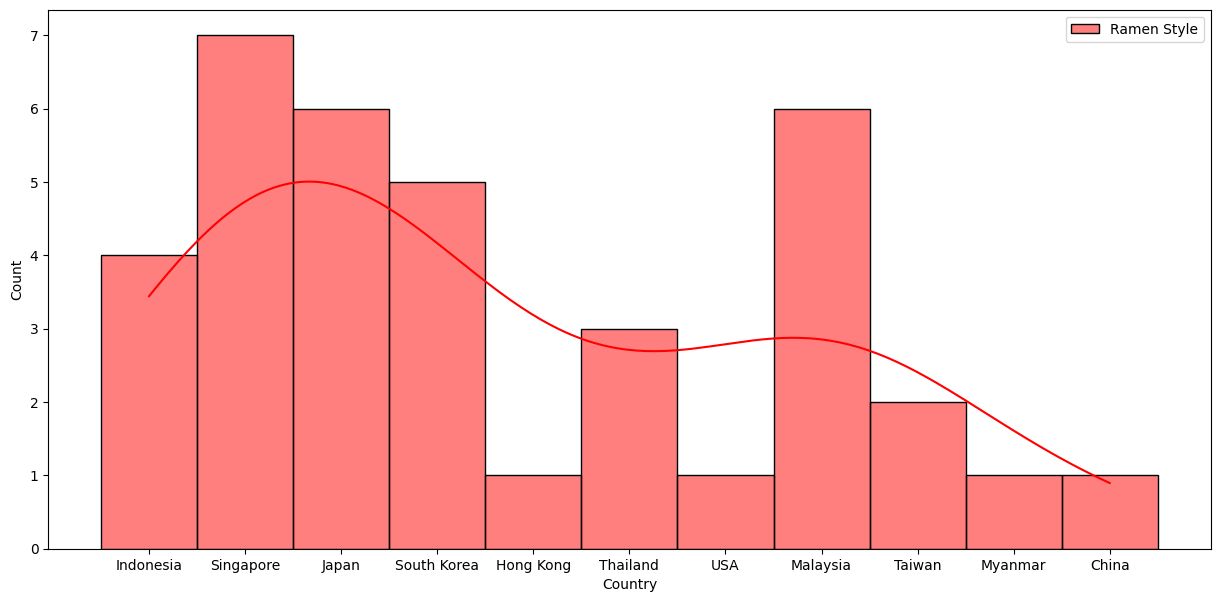

In [27]:
# Visualize the distribution
plt.figure(figsize=(15,7))
sns.histplot(data=top10, x='Country', color='red', label="Ramen Style", kde=True)


# Set x-axis label
plt.xlabel("Country")

# Add legend
plt.legend()

# Show plot
plt.show()


# Top 10 Ramen Brand by total products

- Top 10 Ramen brands that have the most products.


In [28]:
data['Brand'].value_counts()[:10]

Brand
Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
Myojo             63
Indomie           53
Samyang Foods     52
Ottogi            46
Lucky Me!         34
Name: count, dtype: int64


# Top 50 Ramen Ratings by brands

- **Informative:** "To gain insights into brand performance, we'll calculate the average rating for each brand."
- **Action-oriented:** "We'll then identify the top 50 brands based on their average rating."


In [29]:
#First, let's see how many ramen brands are in our data
print("Total no of brands in our dataset:", len(data['Brand'].unique()))

Total no of brands in our dataset: 355


Code Explanation:

The code iterates through the 'Stars' column of a DataFrame named data and attempts to convert each value to a float, handling potential conversion errors.

- **Looping Through Values:**
for s in data['Stars']: This line iterates through each value (s) in the 'Stars' column of the DataFrame data.

- **Conversion Attempt:**
try: data.loc[data['Stars'] == s, 'Stars'] = float(s): This block tries to convert the current value (s) to a floating-point number using float(s).
     - If the conversion is successful, it updates the corresponding row in the 'Stars' column with the converted float value. Here's how it works:
         - .loc: This method allows for label-based selection within the DataFrame.
         - data.loc[data['Stars'] == s]: This part selects rows where the value in the 'Stars' column is equal to the current value (s) being iterated over.
         - , 'Stars'] = float(s): This assigns the converted float value from s to the 'Stars' column for the selected rows.

   ** Handling Conversion Errors:**
**except ValueError:** print(f"Error converting '{s}' to float. Consider replacing or removing this value."): This block catches the ValueError exception that might occur if the conversion to float fails (e.g., encountering a non-numeric value).

In [30]:
for s in data['Stars']:
    try:
        data.loc[data['Stars'] == s, 'Stars'] = float(s)  # Update value in DataFrame
    except ValueError:
        print("Error converting '{}' to float. Consider replacing or removing this value.".format(s))


Error converting 'Unrated' to float. Consider replacing or removing this value.
Error converting 'Unrated' to float. Consider replacing or removing this value.
Error converting 'Unrated' to float. Consider replacing or removing this value.


- So we have found some anomalies in our data which cannot be converted into floating value as it is a text not some number. 
- Some ramen don't have ratings. We can drop it from our data.

In [31]:
data = data[data['Stars'] != 'Unrated']
print(data[data['Stars'] == 'Unrated']['Stars'].sum()) #make sure if there are no 'Unrated'

0


In [32]:
brands = list(data['Brand'].unique())
counter = [0.0]*355

brands_cnt = dict(zip(brands, counter)) #create dictionary to count all ratings and then save the averages

for brand in brands:
    brands_data = data[data['Brand'] == brand]
    for star in brands_data['Stars']:
        brands_cnt[brand] += float(star) #count all ratings
    brands_cnt[brand] /= len(brands_data) #average

The code you provided calculates the average rating for each brand in the DataFrame `data`.

**1. Preparations:**

- `brands = list(data['Brand'].unique())`: This line creates a list named `brands` that contains all unique brand names from the 'Brand' column of the DataFrame `data`. The `unique()` method removes duplicate entries.
- `counter = [0.0]*355`: This line creates a list named `counter` with a length of 355 (assuming you know there are 355 brands) filled with zeros. This list will be used as a temporary counter for each brand's total rating. 

**2. Creating a Dictionary for Counts:**

- `brands_cnt = dict(zip(brands, counter))`: This line creates a dictionary named `brands_cnt`. The `zip` function combines the `brands` list (keys) and `counter` list (values) into pairs. The `dict` function then converts these pairs into a dictionary. Now, each brand name (key) is associated with a corresponding counter value (0.0 initially).

**3. Looping Through Brands and Calculating Averages:**

- `for brand in brands`: This loop iterates through each brand name (`brand`) in the `brands` list.

   - `brands_data = data[data['Brand'] == brand]`: This line filters the `data` DataFrame to keep only rows where the 'Brand' column value matches the current `brand` being iterated over. This gives you a temporary DataFrame (`brands_data`) containing data for the specific brand.

   - `for star in brands_data['Stars']`: This inner loop iterates through each value (`star`) in the 'Stars' column of the filtered `brands_data` DataFrame.

     - `brands_cnt[brand] += float(star)`: This line increments the counter value for the current `brand` (key) in the `brands_cnt` dictionary. It retrieves the current counter value, adds the current star rating (converted to float), and then updates the dictionary with the new sum. Essentially, it's accumulating the total rating for each brand.

   - `brands_cnt[brand] /= len(brands_data)`: After iterating through all star ratings for the current brand, this line calculates the average rating. It divides the total rating count (`brands_cnt[brand]`) by the number of ratings for that brand (`len(brands_data)`) and updates the dictionary value for the brand with the calculated average.

**Overall, the code iterates through each brand, calculates the total rating for that brand, and then divides it by the number of ratings to get the average rating for each brand. The result is stored in the `brands_cnt` dictionary, where each brand name is the key and its average rating is the value.**


In [33]:
top50ratings = [] #list for saving the brand name and its average rating
for key, values in brands_cnt.items():
    top50ratings.append([key,values])

In [34]:
print(top50ratings)

[['New Touch', 4.277777777777778], ['Just Way', 2.75], ['Nissin', 3.918569553805774], ['Wei Lih', 3.45], ["Ching's Secret", 3.8125], ['Samyang Foods', 4.068627450980392], ['Acecook', 3.27], ['Ikeda Shoku', 4.125], ["Ripe'n'Dry", 2.0833333333333335], ['KOKA', 4.21], ['Tao Kae Noi', 5.0], ['Yamachan', 4.568181818181818], ['Nongshim', 4.0], ['TRDP', 3.75], ['Binh Tay', 3.4166666666666665], ['Paldo', 4.018939393939394], ['Jackpot Teriyaki', 5.0], ['Yum-Mie', 3.5], ['MyKuali', 4.947916666666667], ['Sichuan Guangyou', 2.125], ['Lipton', 1.5], ['Lele', 3.5], ['Fujiwara', 3.9642857142857144], ['Uni-President', 3.9583333333333335], ['Ottogi', 3.3944444444444444], ['Maruchan', 3.554276315789474], ['Prima', 5.0], ['Sokensha', 3.5], ['Takamori', 5.0], ['Guava Story', 1.0], ['Samurai Ramen', 4.0], ['Ogasawara', 4.75], ['Pringles', 3.5], ["Mom's Dry Noodle", 4.833333333333333], ['Maggi', 3.68], ['Indomie', 4.070754716981132], ['Happy Cook', 4.416666666666667], ['The Ramen Rater Select', 5.0], ['TTL'

In [35]:
top50_df=pd.DataFrame(top50ratings, columns=['Brand','Stars'])

In [36]:
#Rounding values in the column ['Stars']
top50_df['Stars']= round(top50_df['Stars'], -0)

In [37]:
top50_df

,Brand,Stars
0,New Touch,4.0
1,Just Way,3.0
2,Nissin,4.0
3,Wei Lih,3.0
4,Ching's Secret,4.0
...,...,...
350,Kim Ve Wong,0.0
351,Smack,2.0
352,Sutah,2.0
353,Tung-I,3.0


In [38]:
top50_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brand   355 non-null    object 
 1   Stars   355 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.7+ KB


In [39]:
top50_df_sorted = top50_df.sort_values(by='Stars',ascending=False)
top50_df_sorted

,Brand,Stars
40,Kiki Noodle,5.0
37,The Ramen Rater Select,5.0
164,Torishi,5.0
28,Takamori,5.0
31,Ogasawara,5.0
...,...,...
203,Mitoku,0.0
198,One Dish Asia,0.0
333,US Canning,0.0
339,Tiger,0.0


In [40]:
#Choosing the top 50 brands with more than 4 rating

top50_rating=top50_df_sorted[top50_df_sorted['Stars']>=4][:50]

In [41]:
top50_rating

,Brand,Stars
40,Kiki Noodle,5.0
37,The Ramen Rater Select,5.0
164,Torishi,5.0
28,Takamori,5.0
31,Ogasawara,5.0
249,Kimura,5.0
33,Mom's Dry Noodle,5.0
96,Nyor Nyar,5.0
285,Song Hak,5.0
97,Tseng Noodles,5.0


## Lets visualize

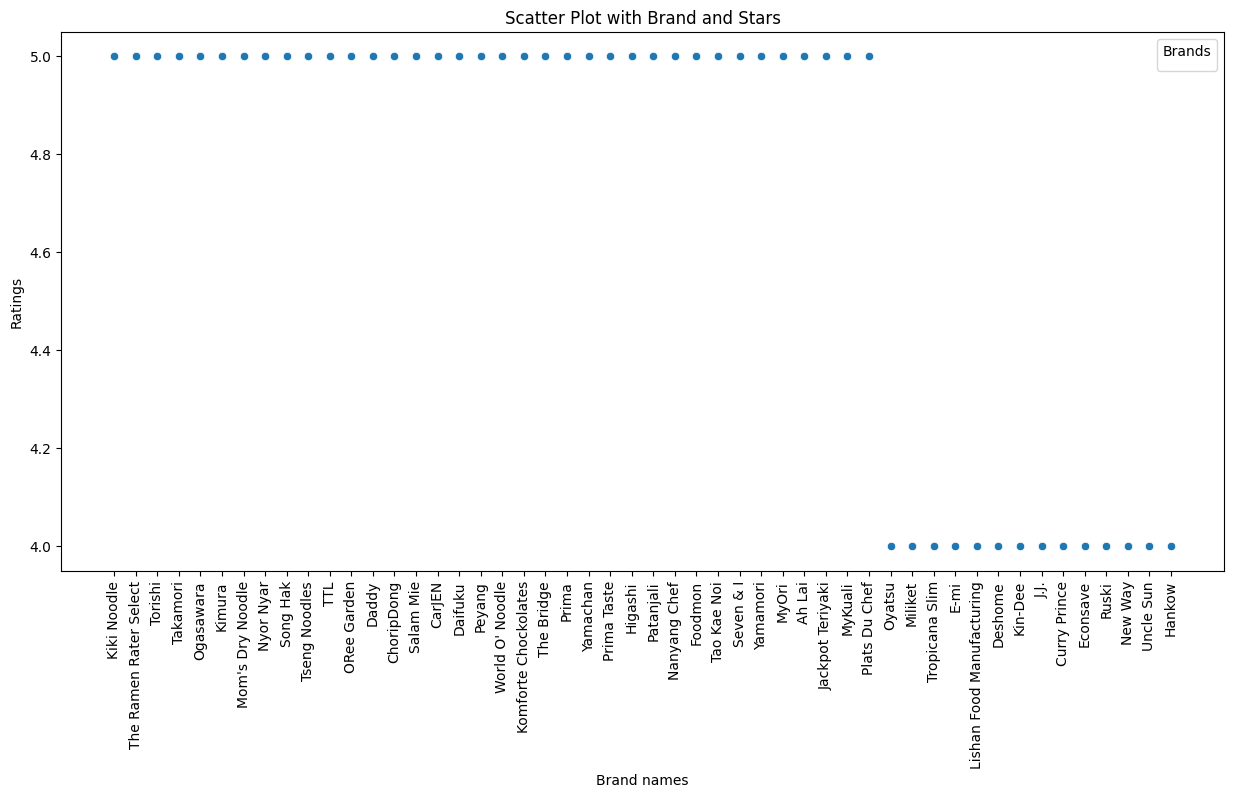

In [42]:
#figure size
plt.figure(figsize=(15,7))
# Scatter plot with hue and size
sns.scatterplot(x='Brand', y='Stars',data=top50_rating)

# Add a title and axis labels
plt.title("Scatter Plot with Brand and Stars")
plt.xlabel("Brand names")
plt.ylabel("Ratings")
plt.xticks(rotation=90)
# Legend for hue
plt.legend(title="Brands")

# Show the plot
plt.show()

# Data Visualization

## Count plot

In Seaborn, a count plot is a visualization that depicts the number of observations in each categorical bin using bars. It's essentially a histogram for categorical data.

Here are some key characteristics of count plots in Seaborn:

- **Categorical Data:** The x or y-axis represents categorical variables, unlike histograms that use continuous numerical data on the x-axis.
- **Bar Heights:** The height of each bar corresponds to the count (frequency) of observations within that category.
- **Color and Style:** You can customize the bar color, hue encoding for comparisons across nested categorical variables, and other visual aspects using Seaborn's API.

**Use Cases:**

Count plots are helpful for:

- **Exploring Categorical Distributions:** You can quickly see how observations are distributed across different categories. 
- **Comparing Categories:** By coloring bars differently or using hue encoding, you can visually compare the distribution of counts across multiple variables.
- **Identifying Trends:** Count plots can reveal patterns or trends in categorical data, such as which categories have the highest or lowest frequencies.

**Seaborn Function:**

The primary function used to create count plots in Seaborn is `sns.countplot()`. It takes various arguments to define the data, variables, aesthetics, and other customization options.

Here's a basic example:

```python
import seaborn as sns
import pandas as pd

# Sample data (replace with your data)
data = {'category': ['A', 'A', 'B', 'C', 'A', 'B', 'C', 'C'],
        'value': [10, 20, 30, 40, 50, 60, 70, 80]}
df = pd.DataFrame(data)

# Create a count plot
sns.countplot(x='category', data=df)
```

This code creates a count plot where the x-axis represents the 'category' variable, and the height of each bar represents the count of observations within that category.

**Additional Features:**

Seaborn's `countplot` function offers various features for customization, such as:

- **Hue Encoding:** Use the `hue` parameter to add color and compare counts across different categories of another variable.
- **Normalization:** Normalize counts to display proportions instead of raw counts using the `normalize` parameter.
- **Error Bars:** Add error bars to represent the standard error of the mean for each category using the `errwidth` parameter.

By leveraging these features and understanding the core concept of count plots, you can create informative visualizations to explore and analyze categorical data in Python using Seaborn.

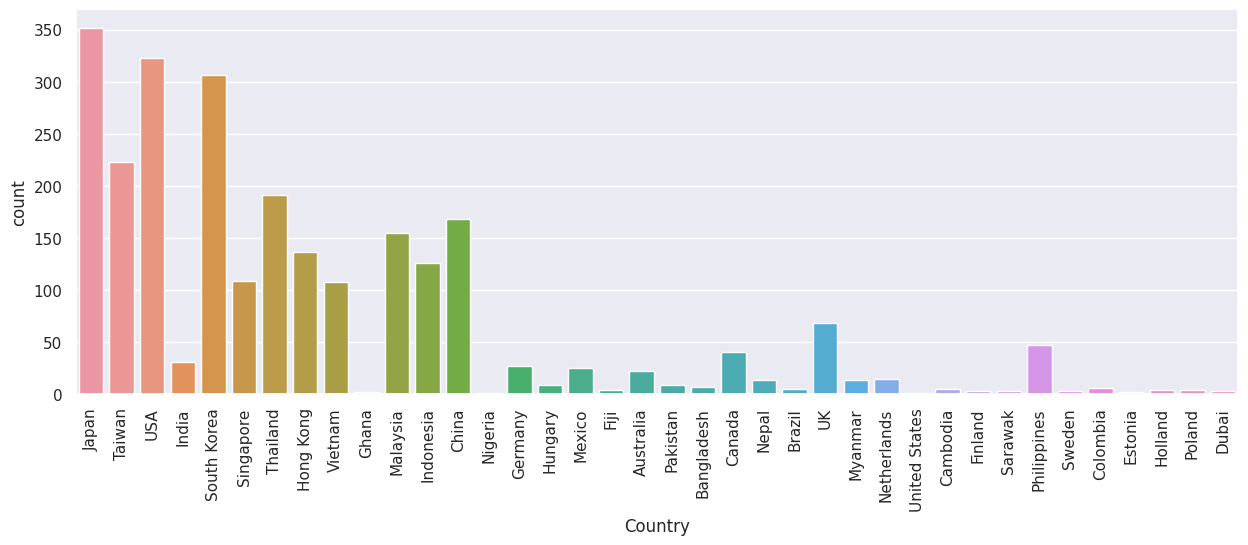

In [43]:
sns.set(style = 'darkgrid')
f, ax = plt.subplots(1,1,figsize = (15,5))
sns.countplot(x = 'Country', data = data)
plt.xticks(rotation=90)

plt.show()

# Pie Chart

In Seaborn, pie charts represent proportions of categorical data slices. Here's a breakdown:

* **Data:** Pie charts visualize categorical data, where each slice represents a category.
* **Slices:** The pie chart is divided into slices, with the size of each slice proportional to the count or percentage of observations in that category.
* **Seaborn Function:**  The `seaborn.pieplot()` function is used to create pie charts.
* **Customization:** You can customize colors, labels, and other visual aspects using Seaborn's API.

**Use Cases:**

Pie charts are useful for:

* **Quick Overview of Proportions:** They provide a high-level view of how data is distributed across categories.
* **Comparing Categories:** By using different colors or adding data labels, you can compare the relative sizes of categories.
* **Limited Categories:** Pie charts are most effective when dealing with a few categories (typically less than 7) for clear visual representation.

**Limitations:**

* **Accuracy:** Pie charts can be misleading for many data points due to limited visual resolution for comparing slice sizes.
* **Clutter:** Including too many categories can make the chart cluttered and difficult to interpret.

For a more precise comparison of proportions, consider using bar charts or other visualizations.


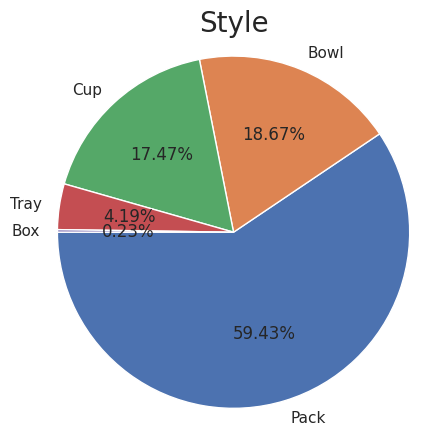

In [44]:
# Let's find out the percentage of total ramen based on style first.

labels = 'Pack', 'Bowl', 'Cup' , 'Tray', 'Box' #We can't include 'Bar' and 'Can' because they only appear once in our data.
size = [1531, 481, 450, 108, 6]

f, ax = plt.subplots(1,1, figsize= (5,5))

ax.pie(size, labels = labels, autopct = '%1.2f%%', startangle = 180)
ax.axis('equal')
ax.set_title("Style", size = 20)

plt.show()

## Visual Upgrade: 

- Use online search and documentation and other tools available to make your figures look better both visually and structurally.

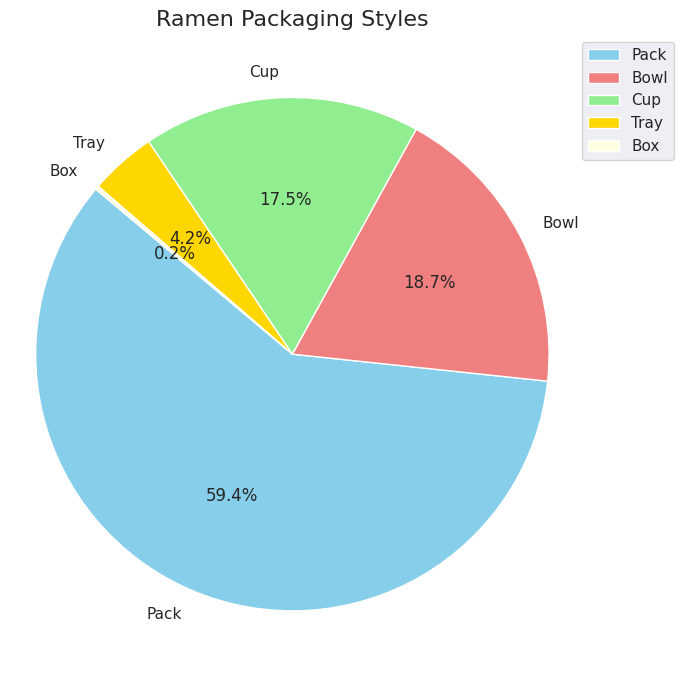

In [45]:
import matplotlib.pyplot as plt

# Colors for each slice
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightyellow']  # Adjust as needed

# Labels
labels = 'Pack', 'Bowl', 'Cup', 'Tray', 'Box'

# Pie chart data (assuming 'size' is a list of values)
data_1 = size

# Create the pie chart with custom edge width
plt.figure(figsize=(7, 7))  # Adjust figure size as needed
wedgeprops = dict(width=1.0)  # Set edge width to 0 for a cleaner look
plt.pie(data_1, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=wedgeprops)
plt.axis('equal')  # Equal aspect ratio for a circular pie

# Customize title and legend
plt.title("Ramen Packaging Styles", fontsize=16)  # Adjust title text
plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))  # Legend position

# Show the plot
plt.tight_layout()
plt.show()


# Scatter plot

Here's a concise explanation of scatter plots in Seaborn:

* **Purpose:** Visualize the relationship between two continuous variables.
* **Data:** Each data point represents an observation with values for two numerical variables (usually plotted on the x and y axes).
* **Seaborn Function:** The `seaborn.scatterplot()` function is used to create scatter plots.
* **Customization:** You can customize point size, color, and other visual aspects using Seaborn's API.

**Key Points:**

* **Trends:** Scatter plots reveal patterns or trends between the two variables. Positive or negative slopes indicate a direct or inverse relationship, respectively.
* **Correlations:** Scatter plots can suggest potential correlations between variables, but they don't necessarily imply causation.
* **Overlapping Points:** Overlapping points indicate multiple observations with the same values for both variables.

**Additional Features:**

* **Hue Encoding:** Use the `hue` parameter to add color and explore relationships across categories of another variable.
* **Regression Lines:** Add regression lines to visualize potential linear relationships between the variables.

**When to Use:**

Scatter plots are ideal for exploring relationships between continuous numerical variables and identifying potential correlations or trends in your data.


In [46]:
data.head()

,Review,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.0,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [47]:
# Lets only visualize for Japan

#Filter Japan from country and its corresponding rows
df_japan=data[data['Country']=='Japan']
df_japan

,Review,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.0,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
13,2567,Nissin,Deka Buto Kimchi Pork Flavor,Bowl,Japan,4.5,NaN
...,...,...,...,...,...,...,...
2554,26,Nissin,Soba Noodles With Mayo Mustard Squirt,Pack,Japan,4.0,NaN
2555,25,Nissin,Demae Ramen Spicy Flavor,Pack,Japan,3.0,NaN
2556,24,Nissin,Demae Ramen Spicy Seafood With Chili Pepper,Pack,Japan,2.0,NaN
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5.0,2012 #4


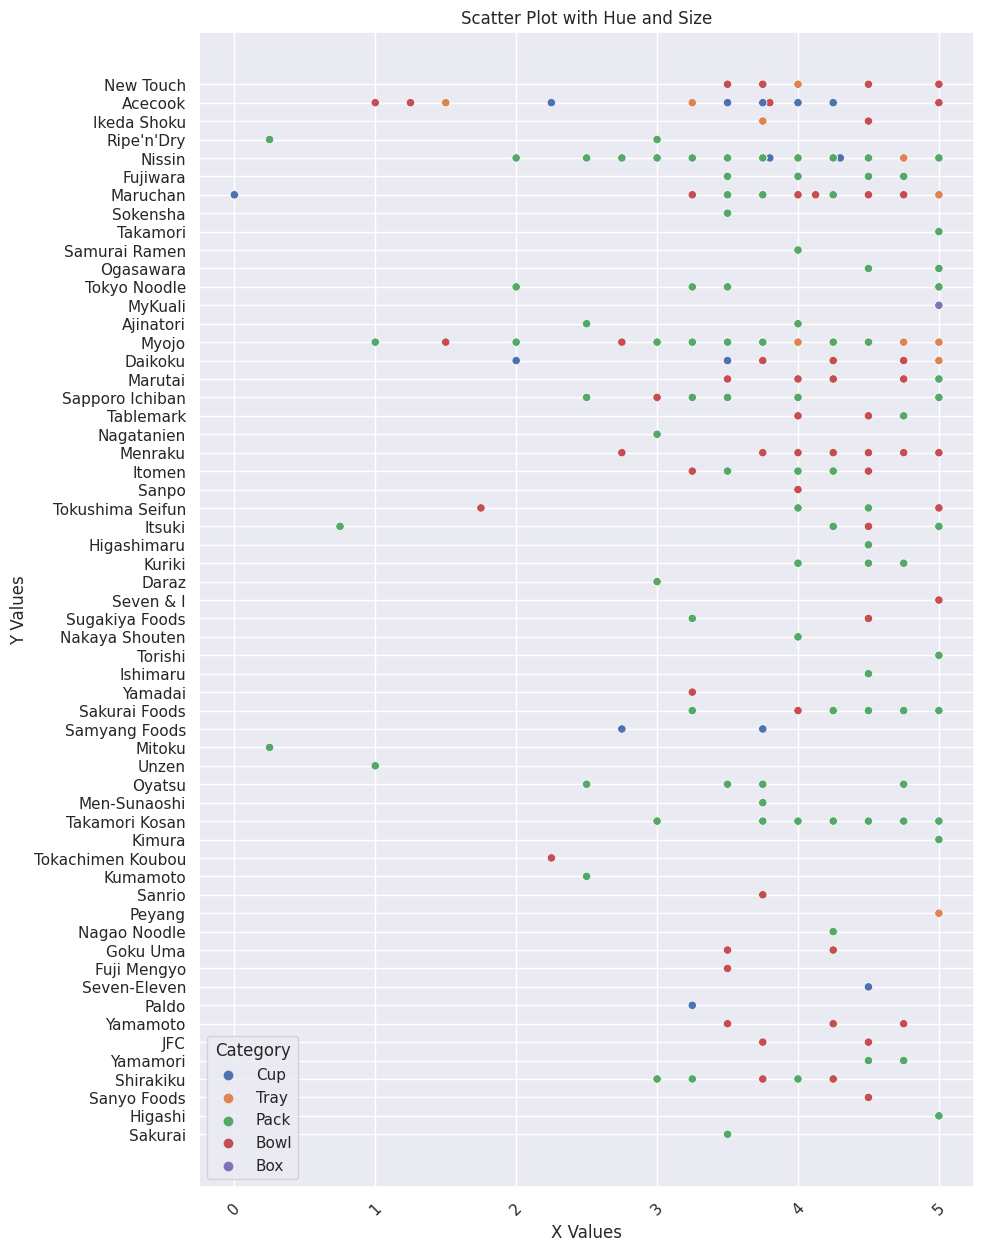

In [48]:
#figure size
plt.figure(figsize=(10,15))
# Scatter plot with hue and size
sns.scatterplot(x='Stars', y='Brand', hue='Style', data=df_japan)

# Add a title and axis labels
plt.title("Scatter Plot with Hue and Size")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.xticks(rotation=45)
# Legend for hue
plt.legend(title="Category")

# Show the plot
plt.show()


## Visual Upgrade: 

- Use online search and documentation and other tools available to make your figures look better both visually and structurally.

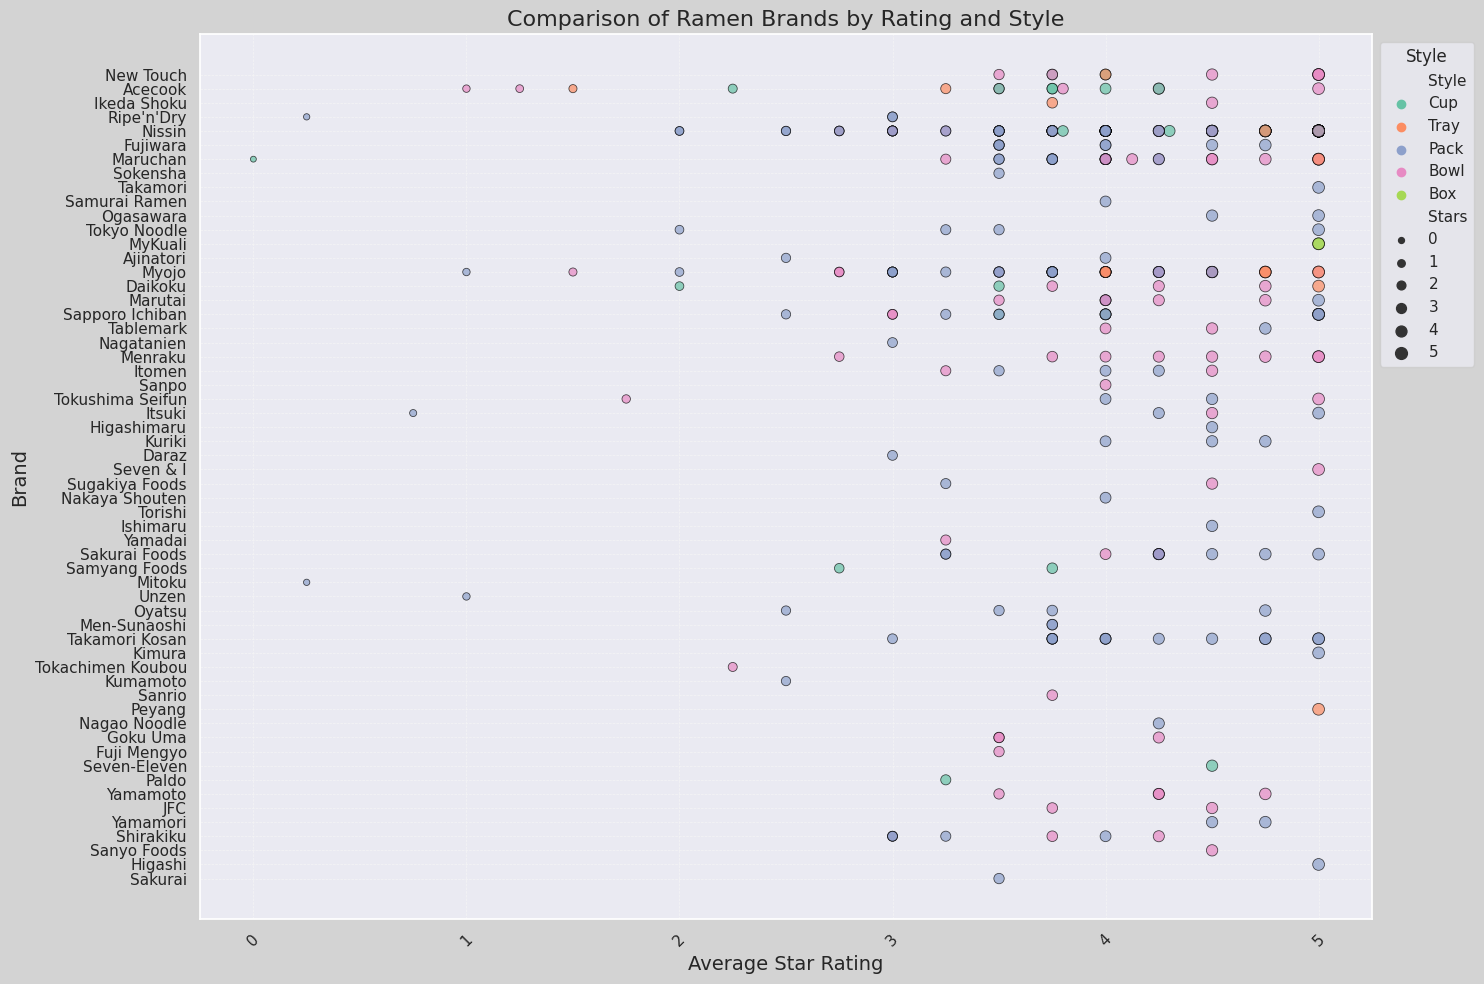

In [49]:
# Adjust figure size and background color
plt.figure(figsize=(15,10), facecolor='lightgray')  # Adjust size and background

# Customize scatter plot with hue and size
sns.scatterplot(
    x='Stars',
    y='Brand',
    hue='Style',
    size='Stars',  # Use Stars column for point size
    data=df_japan,
    palette='Set2',  # Set color palette (adjust as needed)
    edgecolor='black',  # Add black border to points for contrast
    alpha=0.7  # Set transparency level
)

# Customize title, labels, and legend
plt.title("Comparison of Ramen Brands by Rating and Style", fontsize=16)
plt.xlabel("Average Star Rating", fontsize=14)
plt.ylabel("Brand", fontsize=14)
plt.legend(title="Style", loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Reduce grid lines and adjust grid color
plt.grid(color='whitesmoke', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()  # Adjust spacing between elements
plt.show()

# Conclusion

## So in this notebook we have learned the use of python for data analysis and visualization.

- We have been able to explore the key steps from 
    - import of libraries to 
    - loading, viewing, handling of data
    - followed by visualization 
    
### Feel free to add more details and analysis to this. This is a sample which you all can use as reference material.

Thanks